# Matching 

* https://www.youtube.com/watch?v=vT3oGupOSyQ

In [3]:
library(MatchIt)

In [4]:
set.seed(1234)

nb_sample <- 1000
w <- runif(nb_sample)
z <- runif(nb_sample)
x <- rbinom(nb_sample, 1, pnorm(3*z+w-2))
y <- 0 + 0*x + z + 0.5*w * rnorm(nb_sample)
dat <- data.frame(y, x, w, z)

In [5]:
match.1 <- matchit(x ~w + z, data=dat, method="nearest", distance="probit", replace=T)

In [6]:
match.dat <- match.data(match.1, "all")$weights

In [8]:
summary(match.1)


Call:
matchit(formula = x ~ w + z, data = dat, method = "nearest", 
    distance = "probit", replace = T)

Summary of balance for all data:
         Means Treated Means Control SD Control Mean Diff eQQ Med eQQ Mean
distance        0.6645        0.3395     0.2310    0.3249  0.3681   0.3242
w               0.5637        0.4504     0.2845    0.1134  0.1149   0.1125
z               0.6368        0.3346     0.2361    0.3023  0.3397   0.3014
         eQQ Max
distance  0.4526
w         0.1793
z         0.3904


Summary of balance for matched data:
         Means Treated Means Control SD Control Mean Diff eQQ Med eQQ Mean
distance        0.6645        0.6638     0.2381    0.0007  0.1685   0.1515
w               0.5637        0.5323     0.2547    0.0315  0.0601   0.0582
z               0.6368        0.6459     0.2524   -0.0091  0.1612   0.1426
         eQQ Max
distance  0.2186
w         0.1230
z         0.1908

Percent Balance Improvement:
         Mean Diff. eQQ Med eQQ Mean eQQ Max
distance 

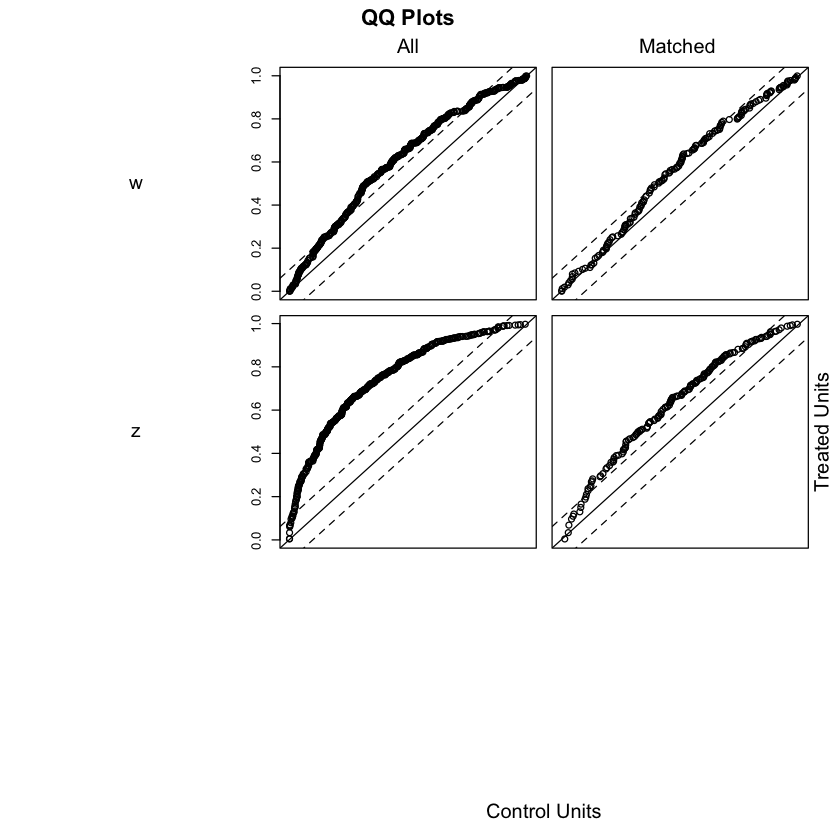

In [9]:
plot(match.1)

In [11]:
# plot(match.1, type="jitter")
# plot(match.1, type="hist")

summary(lm(y~x))



Call:
lm(formula = y ~ x)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.40418 -0.25485  0.00996  0.24902  1.15811 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.33728    0.01725   19.56   <2e-16 ***
x            0.30765    0.02434   12.64   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3849 on 998 degrees of freedom
Multiple R-squared:  0.138,	Adjusted R-squared:  0.1371 
F-statistic: 159.7 on 1 and 998 DF,  p-value: < 2.2e-16


In [12]:
summary(lm(y~x, data=match.dat, weights=match.weight))

ERROR: Error in eval(predvars, data, env): numeric 'envir' arg not of length one
